# Geospatial Study of COVID-19 vis-à-vis Medical Care in India

### By Amrita Iyer

## 1. Introduction

On 30 January, WHO declared COVID-19 a Public Health Emergency of International Concern (PHEIC). India is the second most populous country of the world. According to the 2019 revision of the World Population Prospects, India's population has crossed 1.3 billion.

This population is spread out in 29 states and 7 union territories. Healthcare is a state subject, which means that states are free to cater to their people’s needs as they see fit, on a case-by-case basis. Since Independence, India has focused on the larger picture. The priority in a developing country is primary care at the peripheral level, preventive measures, immunisation, maternity and paediatric care as well as dealing with common infections such as tuberculosis. Public health centres and community health centres are the usual providers of these services. However, not enough hospital beds and specialised facilities have been provided by the public sector during this time.

Hospital-population ratio and the hospital bed-population ratio are good metrics indicating healthcare infrastructure. The World Health Organization provides the rationale behind the hospital beds to population ratio: “Hospital beds are used to indicate the availability of inpatient services. There is no global norm for the density of hospital beds in relation to total population”. As there is no global norm to follow, every country, state and district must build the necessary infrastructure on a case-by-case basis, based on metrics like population, last mile reach. With COVID 19 into the mix, the ratio of population to the number of testing centres has emerged as a new metric to understand how equipped states are dealing with the COVID-19 crisis. Also apparent is the disparateness between rural hospitals/beds and urban hospitals/beds vis-à-vis the population. All this results in a mixed level of public health service in India.

### 1.1 Aim

Public health infrastructure of a country must be equipped to treat its people. This project aims to visualize healthcare infrastructure data of the state containing the highest number of COVID cases as of now, to illustrate why it is necessary to overhaul the public healthcare in India. 

### 1.2 Stakeholders
In general, each and every one of us is a stakeholder in a discussion on healthcare. However, to be more specific, such analysis and visualizations can help administrators and law-makers explore options on how to make healthcare available and affordable to everyone at the national, state and district levels.


## 2. Data

### 2.1 Data sources

The data to be used is summarised below:
1.	Statewise COVID-19 data is available at the Ministry of Health and Family Welfare website rendered into a csv file. It is a public dataset available to all.
2.	Census data, nation-wide hospital data and ICMR (Indian Council of Medical Research) labs are available from Kaggle. These are also public datasets as indicated by the creator. These datasets will be primarily used to visualize the status of healthcare infrastructure in India.
3.	Pincode data with corresponding latitude and longitude is available from Kaggle. It is required to create a database of ICMR labs with respect to their locations. This is also a public dataset.
4.	Google Places API can be leveraged to get a closer look at hospitals within the state containing highest number of COVID19 cases.
5.  Folium based maps will be used to visualize the data geospatially.

### 2.2 Data description and cleaning

The dataset containing COVID-19 patients per state contains the name of the state, the number of active cases, the number of discharged patients, the number of deaths and the total number of cases (which is the aggregate of ‘active’, ‘discharged’ and ‘death’ columns). Firstly, the ‘NaN’ have been identified and removed. Two rows in this dataset contain only NaN values and so have been dropped. The ‘S.no.’  column is redundant and can be dropped. The shape of the dataframe shows 36 values, which corresponds to the total of states and union territories. Finally, the columns are renamed as follows:

The healthcare data contains the name of the state, and the numbers of primary healthcare centres (PHC), community healthcare centres (CHC), sub district hospitals (SDH), total public health facilities (TPHF), district hospitals (DH), rural hospitals (RH), urban hospitals (UH), the total number of public beds (PublicBeds), the number of rural beds (RuralBeds) and the number of urban beds (UrbanBeds). The original column names have been changed to those in brackets. For the purpose of this study, the columns of PHC, CHC, TPHF have been dropped as they do not have specialised facilities meant to deal with a crisis such as COVID 19. This is not to suggest that such places are not contributing in dealing with the crisis. Their primary capability includes basic healthcare, prevention and educating the public. Second, the column ‘SDH’ have to be dropped as there were missing values. Third, the column ‘DH’ also has been dropped as the main aim is to compare the numbers of rural and urban hospitals. DH can be categorised under either category and so complicate the analysis.

The ICMR data contains the names of the labs, their full addresses, pincodes, cities, states and the type of institution. The columns containing addresses have been dropped as pincode, city and state are enough. The column containing ‘type’ has been dropped as the entire list is of ICMR labs. Out of the 170 rows, 2 rows are missing this data. They have been dropped as well.

The dataset containing pincodes has the pincodes in relation to the name of the place, the city, latitude, longitude and accuracy. Excepting the pincodes, latitude and longitude, all other columns have been dropped.

The final dataframe is a merged dataset of the cleaned datasets.

Apart from this, Google Places API has been used to get the location of hospitals in the concerned ‘State/UT’ for analysis.

## 3. Methodology

First we install folium and missingno. Missingno is a tool to visually check for missing data.

In [2]:
!pip install folium

     |████████████████████████████████| 102kB 6.8MB/s ta 0:00:011


In [3]:
!pip install missingno

Next we import the necessary libraries: pandas, numpy, folium, geocoders, requests, missingno, matplotlib and seaborn

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
import missingno
import matplotlib.pyplot as plt

Then we download all the files and save them as dataframes. There are 4 datasets to be downloaded. I uploaded the files to 'Data Assets' section of IBM Watson in relation to this project. Hence the code with respect to those files have been hidden

In [5]:
# The code was removed by Watson Studio for sharing.

,S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,1.0,Andaman and Nicobar Islands,10.0,35.0,0.0,45.0
1,2.0,Andhra Pradesh,3948.0,3917.0,96.0,7961.0
2,3.0,Arunachal Pradesh,92.0,11.0,0.0,103.0
3,4.0,Assam,1856.0,3039.0,9.0,4904.0
4,5.0,Bihar,2033.0,5098.0,50.0,7181.0


In [6]:
cases.drop(['S. No.'], axis=1, inplace=True)
cases.shape

(37, 5)

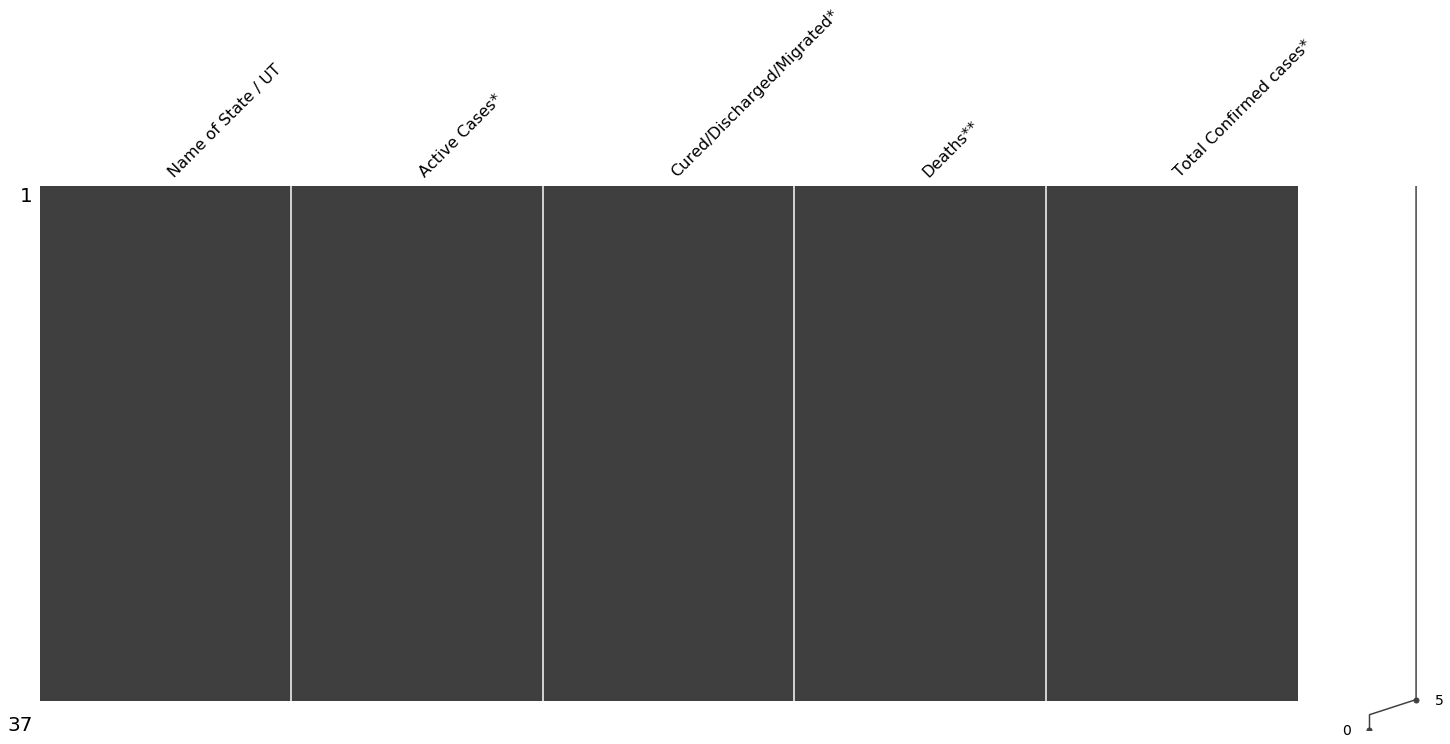

In [7]:
missingno.matrix(cases)

Missingno indicates that there are values missing at the bottom of the dataframe. These must be dropped

In [8]:
cases.isna().values.any()

True

In [9]:
cases.dropna(inplace=True)
cases.shape

(35, 5)

In [92]:
cases.rename(columns={'Name of State / UT':'State/UT','Cured/Discharged/Migrated*':'Discharged','Deaths**':'Deaths','Active Cases*':'Active','Total Confirmed cases*':'Total'}, inplace=True)
cases.head()

,State/UT,Active,Discharged,Deaths,Total
0,Andaman and Nicobar Islands,10.0,35.0,0.0,45.0
1,Andhra Pradesh,3948.0,3917.0,96.0,7961.0
2,Arunachal Pradesh,92.0,11.0,0.0,103.0
3,Assam,1856.0,3039.0,9.0,4904.0
4,Bihar,2033.0,5098.0,50.0,7181.0


In [11]:
# The code was removed by Watson Studio for sharing.

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,6,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,7,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,8,Dadra & Nagar Haveli and Daman and Diu,13,4,1.0,3,21,866,15,513,1,316
8,9,Delhi,534,25,9.0,47,615,20572,0,0,109,24383
9,10,Goa,31,4,2.0,3,40,2666,17,1405,25,1608


In [12]:
hb.drop(['Sno'], axis=1, inplace=True)
df_hb = hb.rename(columns={"NumPrimaryHealthCenters_HMIS":"PHC", "NumCommunityHealthCenters_HMIS":"CHC", "NumSubDistrictHospitals_HMIS":"SDH", 
                        "NumDistrictHospitals_HMIS":"DH","TotalPublicHealthFacilities_HMIS":"TPHF", "NumPublicBeds_HMIS":"PublicBeds",
                        "NumRuralHospitals_NHP18":"RH", "NumRuralBeds_NHP18":"RuralBeds", "NumUrbanHospitals_NHP18":"UH",
                         "NumUrbanBeds_NHP18":"UrbanBeds"})
df_hb['State/UT'] = df_hb['State/UT'].str.replace('&','and')
df_hb.head()

,State/UT,PHC,CHC,SDH,DH,TPHF,PublicBeds,RH,RuralBeds,UH,UrbanBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


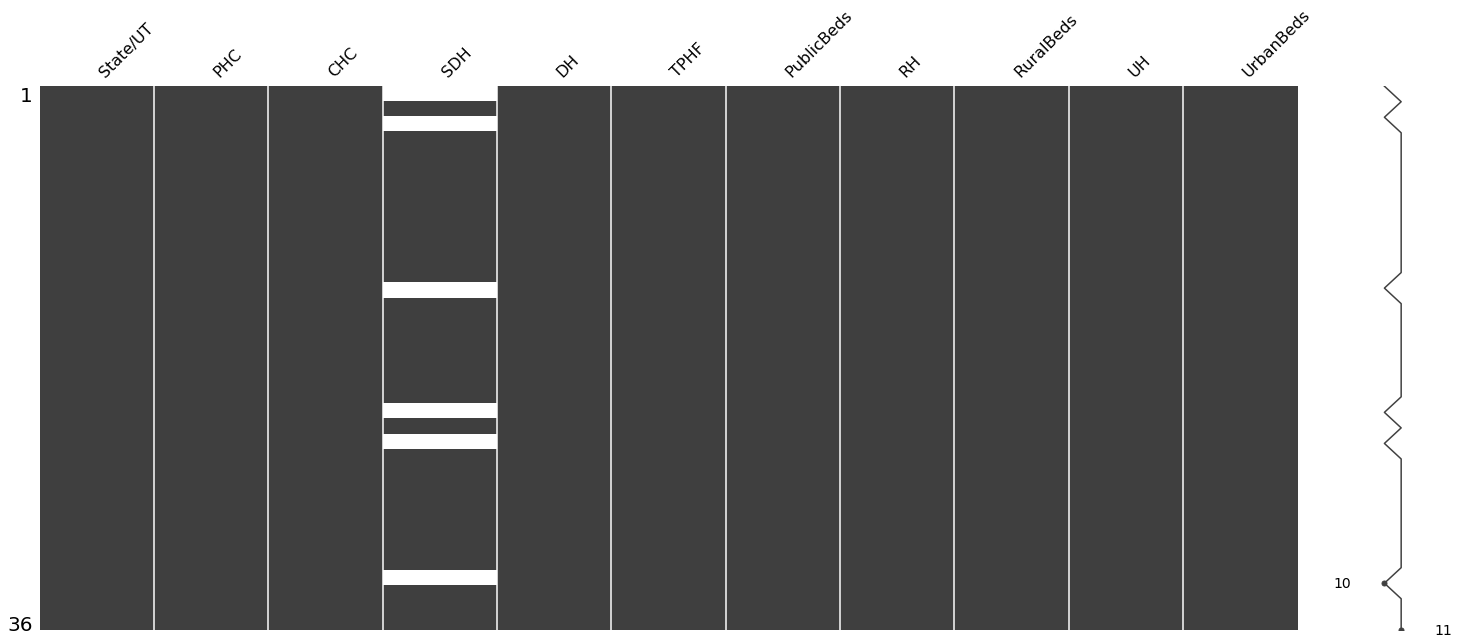

In [13]:
missingno.matrix(df_hb)

As parts of the data in SDH is missing, it is dropped. Apart from this, the columns PHC, CHC, TPHF, DH are not related to this study. Hence they are dropped

In [14]:
df_hb.drop(['SDH','PHC','CHC','TPHF','DH'], axis=1, inplace=True)
df_hb.head()

,State/UT,PublicBeds,RH,RuralBeds,UH,UrbanBeds
0,Andaman and Nicobar Islands,1246,27,575,3,500
1,Andhra Pradesh,60799,193,6480,65,16658
2,Arunachal Pradesh,2320,208,2136,10,268
3,Assam,19115,1176,10944,50,6198
4,Bihar,17796,930,6083,103,5936


In [93]:
df= pd.merge(cases,df_hb,on='State/UT')
df.shape

(34, 10)

In [94]:
df.head()

,State/UT,Active,Discharged,Deaths,Total,PublicBeds,RH,RuralBeds,UH,UrbanBeds
0,Andaman and Nicobar Islands,10.0,35.0,0.0,45.0,1246,27,575,3,500
1,Andhra Pradesh,3948.0,3917.0,96.0,7961.0,60799,193,6480,65,16658
2,Arunachal Pradesh,92.0,11.0,0.0,103.0,2320,208,2136,10,268
3,Assam,1856.0,3039.0,9.0,4904.0,19115,1176,10944,50,6198
4,Bihar,2033.0,5098.0,50.0,7181.0,17796,930,6083,103,5936


In [17]:
# The code was removed by Watson Studio for sharing.

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


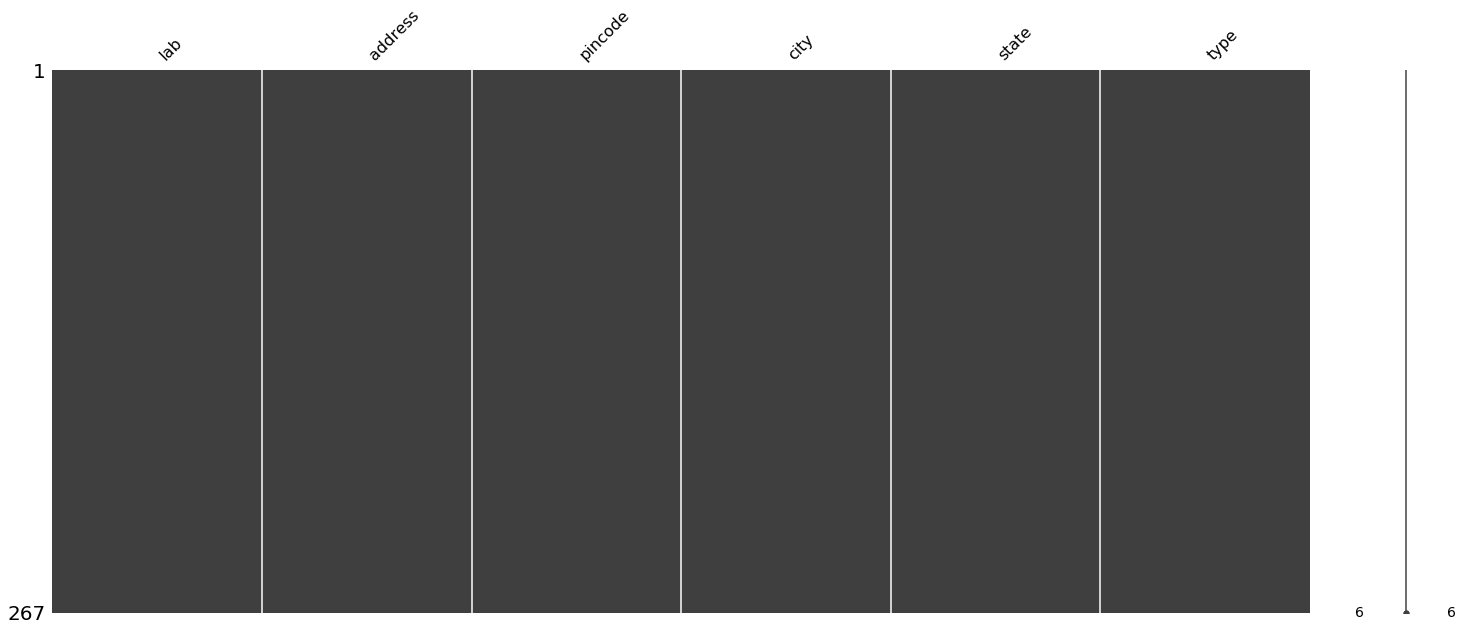

In [95]:
missingno.matrix(icmr)

No data missing. Hence we process with renaming columns and dropping columns that are not required

In [18]:
df_icmr = icmr.rename(columns={"state":"State/UT"})
df_icmr.drop(['address','city','type'], axis=1, inplace=True)
df_icmr.head()

,lab,pincode,State/UT
0,"ICMR-Regional Medical Research Centre, Port Blair",744103,Andaman and Nicobar Islands
1,Tomo Riba Institute of Health & Medical Scienc...,791110,Arunachal Pradesh
2,Sri Venkateswara Institute of Medical Sciences...,517507,Andhra Pradesh
3,"Rangaraya Medical College, Kakinada",533001,Andhra Pradesh
4,"Sidhartha Medical College, Vijaywada",520008,Andhra Pradesh


In [19]:
df_icmr.shape

(267, 3)

In [20]:
# The code was removed by Watson Studio for sharing.

,key,place_name,admin_name1,latitude,longitude,accuracy
0,IN/110001,Connaught Place,New Delhi,28.6333,77.2167,4.0
1,IN/110002,Darya Ganj,New Delhi,28.6333,77.2500,4.0
2,IN/110003,Aliganj,New Delhi,28.6500,77.2167,NaN
3,IN/110004,Rashtrapati Bhawan,New Delhi,28.6500,77.2167,NaN
4,IN/110005,Lower Camp Anand Parbat,New Delhi,28.6500,77.2000,NaN


In [21]:
pincodes['key']= pincodes['key'].str.replace('IN/','')
pincodes.head()

,key,place_name,admin_name1,latitude,longitude,accuracy
0,110001,Connaught Place,New Delhi,28.6333,77.2167,4.0
1,110002,Darya Ganj,New Delhi,28.6333,77.2500,4.0
2,110003,Aliganj,New Delhi,28.6500,77.2167,NaN
3,110004,Rashtrapati Bhawan,New Delhi,28.6500,77.2167,NaN
4,110005,Lower Camp Anand Parbat,New Delhi,28.6500,77.2000,NaN


In [22]:
df_p= pincodes.rename(columns={'key':'pincode'})
df_p.drop(columns={'place_name', 'admin_name1', 'accuracy'}, axis=1, inplace=True)
df_p.head()

,pincode,latitude,longitude
0,110001,28.6333,77.2167
1,110002,28.6333,77.2500
2,110003,28.6500,77.2167
3,110004,28.6500,77.2167
4,110005,28.6500,77.2000


In [23]:
pincodes.isna().values.any()

True

In [24]:
pincodes.dropna(inplace=True)

In [25]:
df_icmr['pincode']=df_icmr['pincode'].astype(int)
df_p['pincode']= df_p['pincode'].astype(int)

Here we merge the dataframe containing latitude and longitude with the lab and pincode dataframe

In [26]:
df2= pd.merge(df_icmr, df_p, on='pincode')
df2.head()

,lab,pincode,State/UT,latitude,longitude
0,"ICMR-Regional Medical Research Centre, Port Blair",744103,Andaman and Nicobar Islands,11.6667,92.7333
1,Sri Venkateswara Institute of Medical Sciences...,517507,Andhra Pradesh,14.5500,78.7500
2,"Rangaraya Medical College, Kakinada",533001,Andhra Pradesh,17.0222,82.1028
3,"Government Medical College, Anantapur",515001,Andhra Pradesh,14.3447,77.8319
4,"Guntur Medical College, Guntur",522004,Andhra Pradesh,16.3375,80.3083


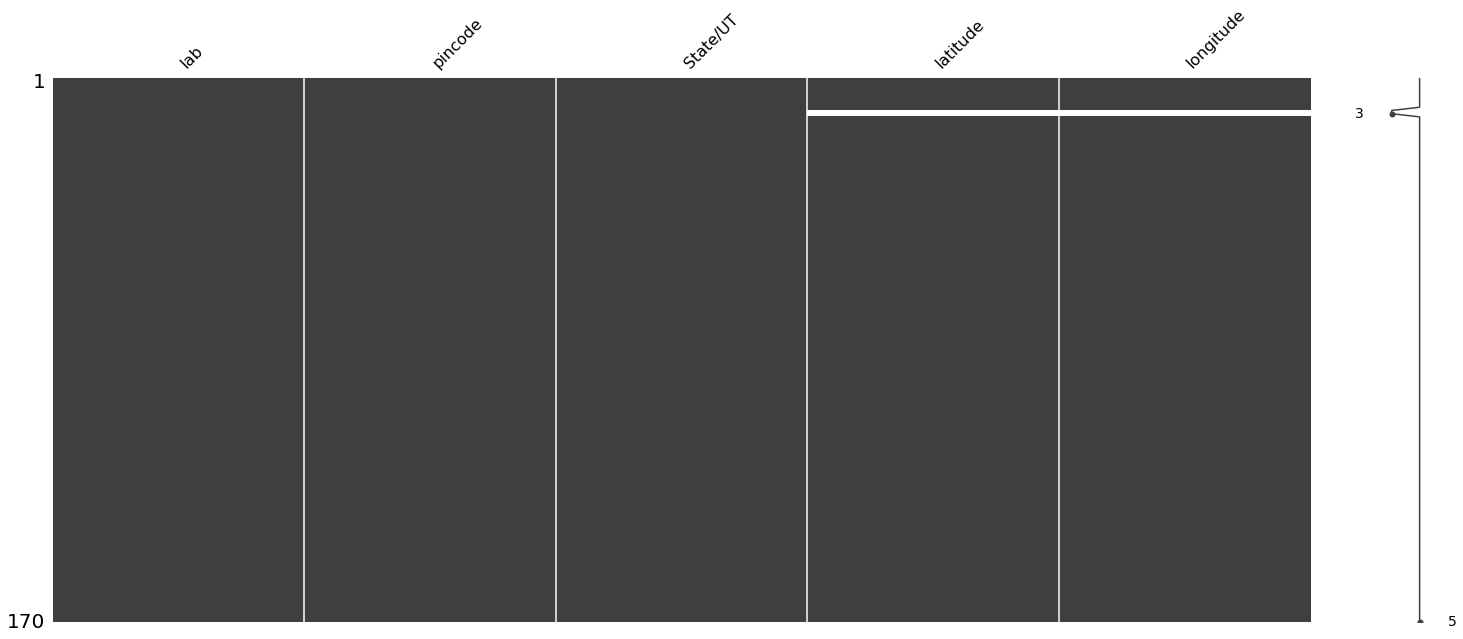

In [27]:
missingno.matrix(df2)

In [28]:
df2.dropna(inplace=True)
df2.shape

(168, 5)

In [29]:
df2_state=df2.groupby(['State/UT']).count()
df2_state=df2_state[["lab"]]
df2_state.head()

,lab
State/UT,
Andaman and Nicobar Islands,1
Andhra Pradesh,5
Assam,4
Bihar,2
Chandigarh,2


This is the final merged dataframe

In [30]:
df_fin= pd.merge(df, df2_state, on='State/UT')
df_fin.head()

,State/UT,Active,Discharged,Deaths,Total,PublicBeds,RH,RuralBeds,UH,UrbanBeds,lab
0,Andaman and Nicobar Islands,10.0,35.0,0.0,45.0,1246,27,575,3,500,1
1,Andhra Pradesh,3948.0,3917.0,96.0,7961.0,60799,193,6480,65,16658,5
2,Assam,1856.0,3039.0,9.0,4904.0,19115,1176,10944,50,6198,4
3,Bihar,2033.0,5098.0,50.0,7181.0,17796,930,6083,103,5936,2
4,Chandigarh,60.0,315.0,6.0,381.0,3756,0,0,4,778,2


## 3. Methodology

### 3.1 Seaborn relplot

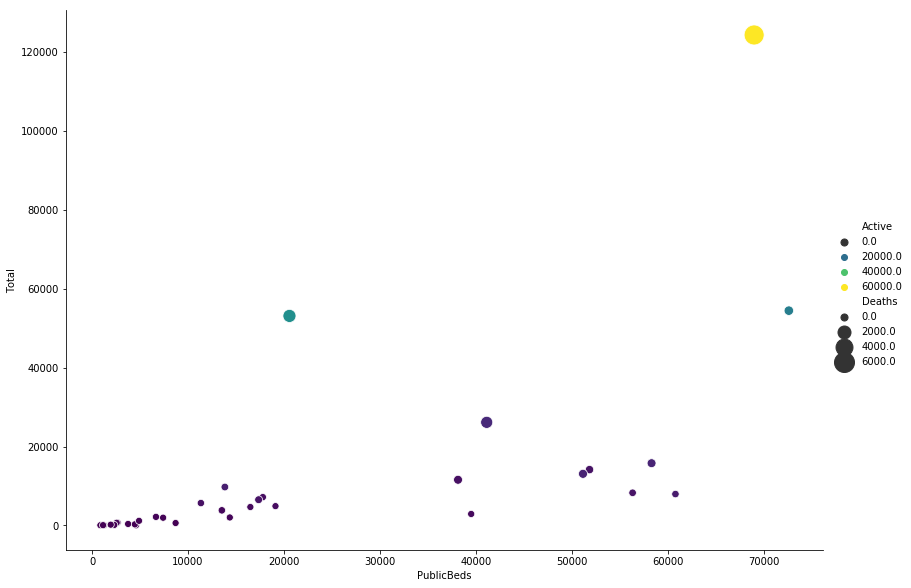

In [31]:
sns.relplot(x='PublicBeds', y='Total', hue='Active', size='Deaths', sizes=(50, 400), palette='viridis', 
                 alpha=1, height=8.27, aspect=11.7/8.27, data=df)

### 3.2 Combined bar graphs & bar graphs

#### A. Statewise comparison of rural beds to urban beds

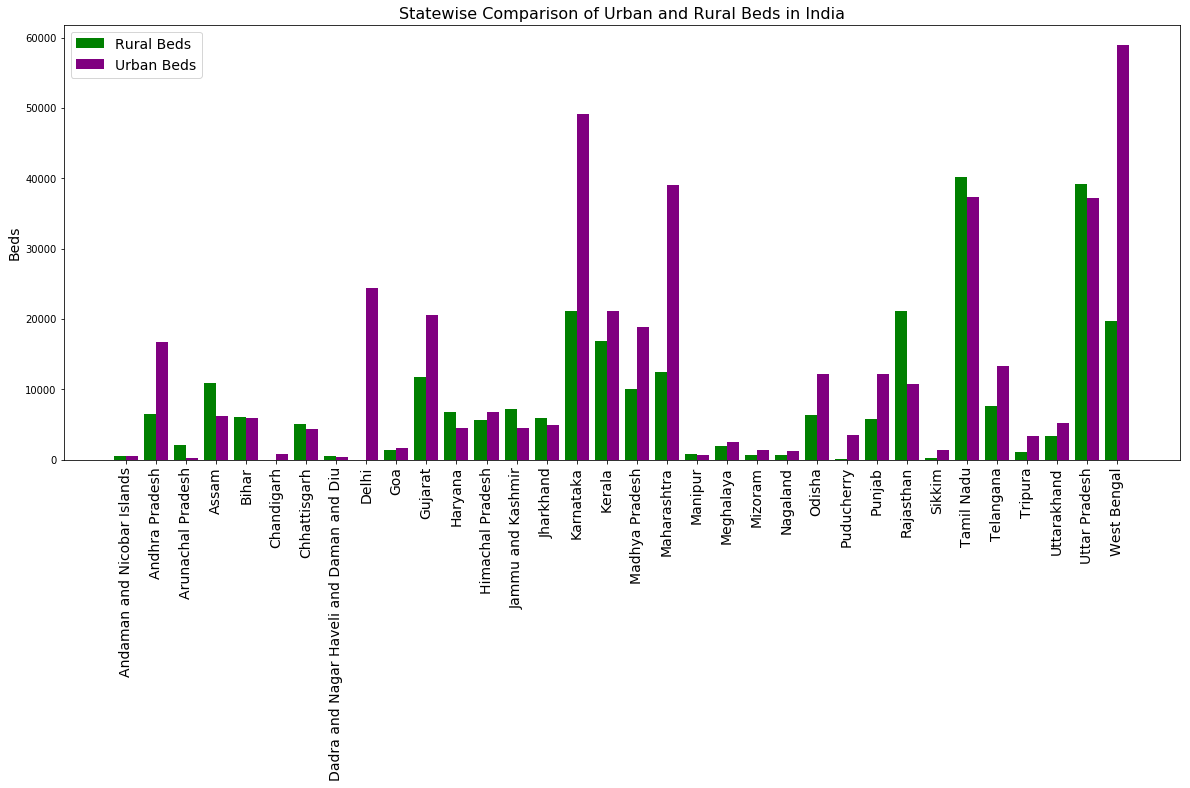

In [32]:
labels = ['Andaman and Nicobar Islands','Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chandigarh','Chhattisgarh',
          'Dadra and Nagar Haveli and Daman and Diu','Delhi','Goa','Gujarat','Haryana','Himachal Pradesh','Jammu and Kashmir',
          'Jharkhand','Karnataka','Kerala','Madhya Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Odisha',
          'Puducherry','Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura','Uttarakhand','Uttar Pradesh','West Bengal']
y1=df["RuralBeds"]
y2=df["UrbanBeds"]

x = np.arange(len(labels))
width=0.4
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,8))

ax.bar(x, y1, width=-1.*width, align='edge', label="Rural Beds", color='green')
ax.bar(x, y2, width=width, align='edge', color='purple', label="Urban Beds")

ax.set_ylabel('Beds', fontsize=14)
ax.set_title('Statewise Comparison of Urban and Rural Beds in India', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(fontsize=14)

plt.xticks(rotation=90) 
plt.show()

#### B. Statewise comparison of rural hospitals to urban hospitals 

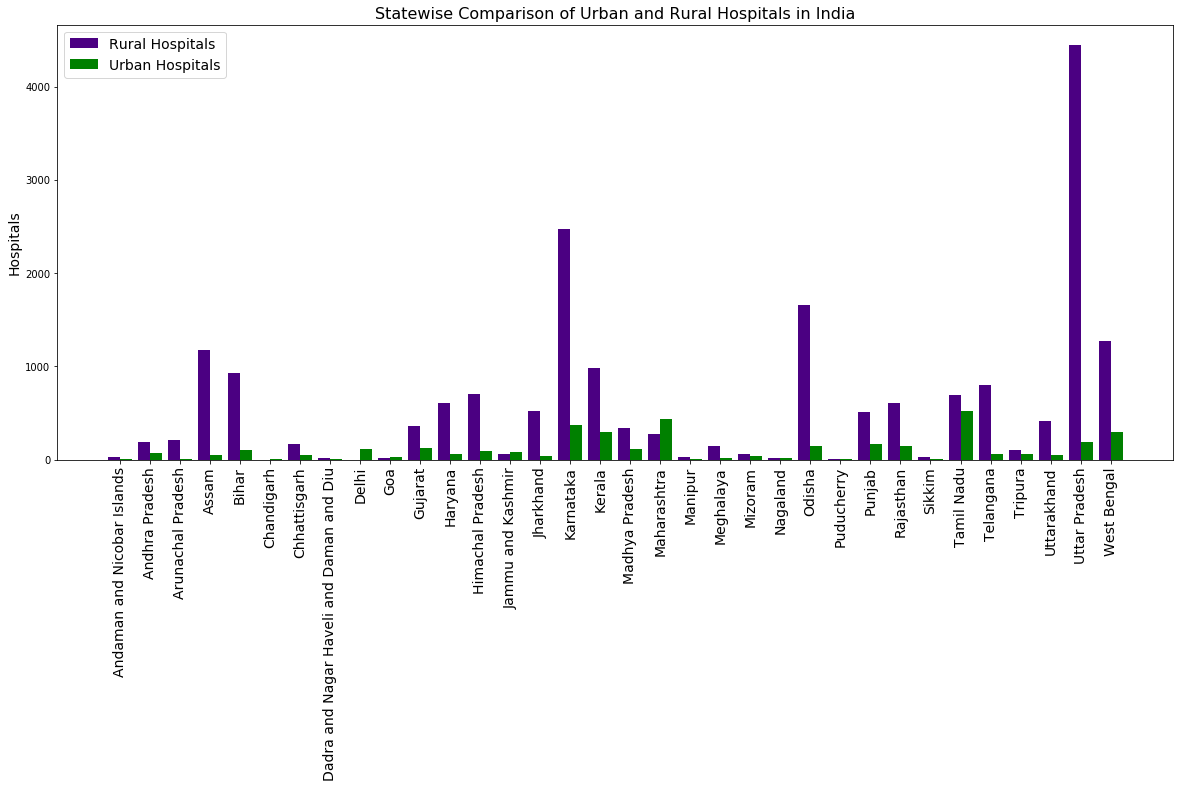

In [33]:
labels = ['Andaman and Nicobar Islands','Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chandigarh','Chhattisgarh',
          'Dadra and Nagar Haveli and Daman and Diu','Delhi','Goa','Gujarat','Haryana','Himachal Pradesh','Jammu and Kashmir',
          'Jharkhand','Karnataka','Kerala','Madhya Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Odisha',
          'Puducherry','Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura','Uttarakhand','Uttar Pradesh','West Bengal']
y1=df["RH"]
y2=df["UH"]

x = np.arange(len(labels))
width=0.4
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,8))

ax.bar(x, y1, width=-1.*width, align='edge', label="Rural Hospitals", color='indigo')
ax.bar(x, y2, width=width, align='edge', color='green', label="Urban Hospitals")

ax.set_ylabel('Hospitals', fontsize=14)
ax.set_title('Statewise Comparison of Urban and Rural Hospitals in India', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(fontsize=14)

plt.xticks(rotation=90) 
plt.show()

#### C. ICMR Testing centre per state

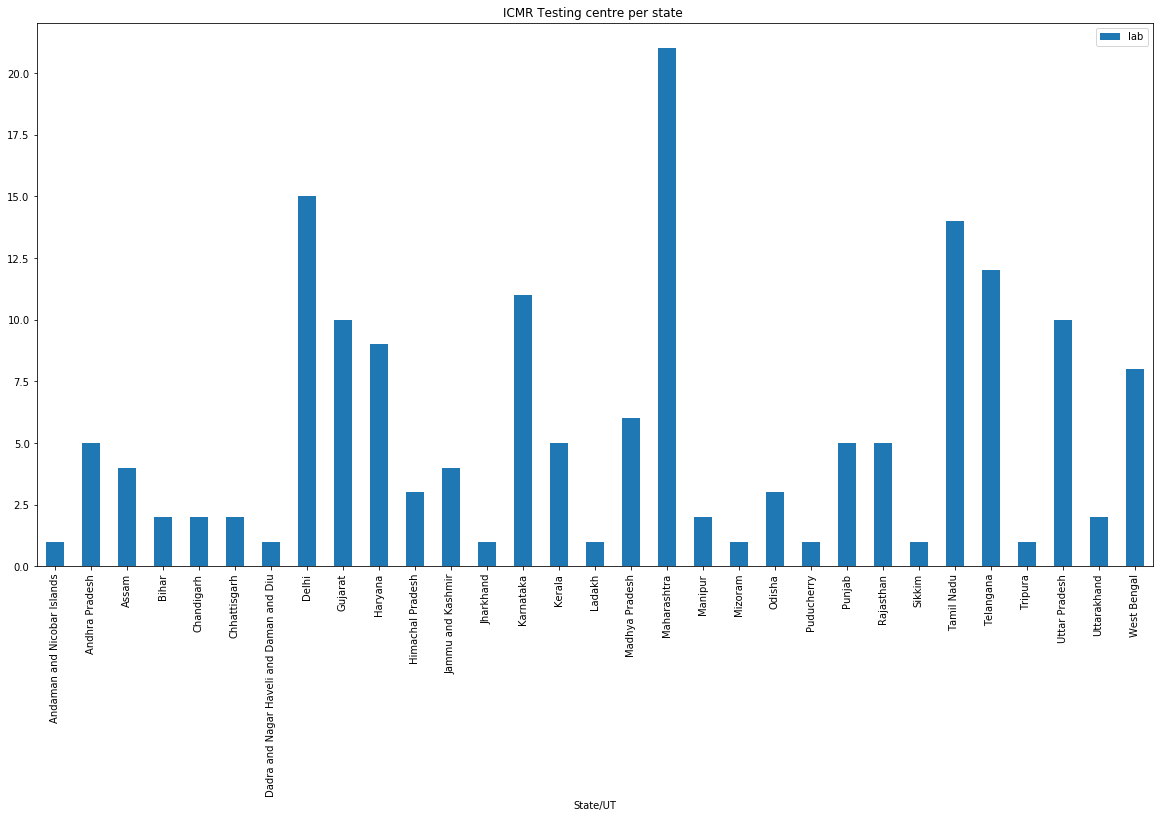

In [97]:
df2_state.plot(kind='bar',figsize=(20,10), title='ICMR Testing centre per state ')

### 3.3 Google Places API and Maps

In [35]:
address = 'Maharashtra'
geolocator = Nominatim(user_agent="mum_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Maharashtra are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Maharashtra are 19.531932, 76.0554568.


In [98]:
df_mah_lab = df2[df2['State/UT'] == 'Maharashtra'].reset_index(drop=True)
df_mah_lab.head()

,lab,pincode,State/UT,latitude,longitude
0,"Seth GS Medical College & KEM Hospital, Mumbai",400012,Maharashtra,19.0167,72.85
1,"National Institute of Virology Field Unit, Mumbai",400012,Maharashtra,19.0167,72.85
2,"Haffkine Institute, Mumbai",400012,Maharashtra,19.0167,72.85
3,ICMR-National Institute for Research in Reprod...,400012,Maharashtra,19.0167,72.85
4,"Tata Memorial Centre Diagnostic Services, Tata...",400012,Maharashtra,19.0167,72.85


#### A. Map showing ICMR labs in Maharashtra

In [37]:
mah= folium.Map(location=[latitude, longitude], zoom_start=7)

# add markers to map
for lat, lng, lab, pin in zip(df_mah_lab['latitude'], df_mah_lab ['longitude'], df_mah_lab['lab'], df_mah_lab['pincode']):
    label = '{}, {}'.format(lab, pin)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mah)  
    
mah


In [51]:
!pip install python-google-places
from googleplaces import GooglePlaces, types, lang 
import requests 
import json 

  Stored in directory: /home/dsxuser/.cache/pip/wheels/b8/85/d3/9e591bba4afe2b9c4a8e3c95e5037f4fa19bd76c3333dfb76f
Successfully built python-google-places


#### Google Places API
Google Places API has been used to visualize hospitals in chosen locations in Maharashtra to show that most are clustered in urban areas, with very few hospitals in surrounding rural areas

First the API key must be initialized, which is why the following cell is hidden. This API key must then be fed into the program to query location results.

The comparison is between Jalna and Mumbai

In [59]:
# The code was removed by Watson Studio for sharing.

In [60]:
google_places = GooglePlaces(API_KEY)

In [99]:
query_result = google_places.nearby_search(  
        lat_lng ={'lat': 19.531932, 'lng': 76.0554568}, 
        radius = 500000, 
        types =[types.TYPE_HOSPITAL]) 

if query_result.has_attributions: 
    print (query_result.html_attributions) 
    
for place in query_result.places: 
    # print(type(place)) 
    # place.get_details() 
    print (place.name) 
    print("Latitude", place.geo_location['lat']) 
    print("Longitude", place.geo_location['lng']) 
    print()

Saniya Hospital
Latitude 19.3933962
Longitude 76.0577806

Primary Health Centre, KU PIMPALGAON
Latitude 19.3898246
Longitude 76.05728189999999

Kapse clinic
Latitude 19.38265
Longitude 76.22016839999999

Om Hospital
Latitude 19.842965
Longitude 75.90482999999999

Ambekar Hospital
Latitude 19.8439353
Longitude 75.9211117

Hushe's Jalna Hospital
Latitude 19.8230766
Longitude 75.8822285

Jalna Hospital
Latitude 19.823128
Longitude 75.882193

Hushe's Jalna Hospital
Latitude 19.8239574
Longitude 75.88338739999999

Sanjeevani Hospital
Latitude 19.824986
Longitude 75.88337799999999

Ruby Hospital
Latitude 19.846729
Longitude 75.905168

Agarwal Hospital
Latitude 19.84322329999999
Longitude 75.91404779999999

Corporation Hospital
Latitude 19.8420885
Longitude 75.9102623

Chaitanya Rehabilitation Centre
Latitude 19.8427478
Longitude 75.90985569999999

Prayag Hospital
Latitude 19.8348547
Longitude 75.8914877

Soni Hospital
Latitude 19.844143
Longitude 75.90881499999999

Deepak Hospital
Latitude 1

In [100]:
df = pd.DataFrame(columns = ['lat','lng'])

ctr = 0
for place in query_result.places:
    for key, item in place.geo_location.items():
        df.loc[ctr, key] = item
    ctr += 1

In [101]:
df.head()

,lat,lng
0,19.3933962,76.0577806
1,19.3898246,76.05728189999999
2,19.38265,76.22016839999999
3,19.842965,75.90482999999999
4,19.8439353,75.9211117


In [86]:
jalna= folium.Map(location=[lat, lng], zoom_start=7)

for lat, lng in zip(df['lat'], df['lng']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(jalna)  
    
jalna

In [81]:
address = 'Mumbai'

geolocator = Nominatim(user_agent="mum_explorer2")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Mumbai are 18.9387711, 72.8353355.


In [103]:
query_result = google_places.nearby_search(  
        lat_lng ={'lat': 18.9387711, 'lng': 72.8353355}, 
        radius = 500000, 
        types =[types.TYPE_HOSPITAL]) 

if query_result.has_attributions: 
    print (query_result.html_attributions) 
    
for place in query_result.places: 
    # print(type(place)) 
    # place.get_details() 
    print (place.name) 
    print("Latitude", place.geo_location['lat']) 
    print("Longitude", place.geo_location['lng']) 
    print()

Bhatia Hospital
Latitude 18.9657017
Longitude 72.8133541

Jaslok Hospital and Research Centre
Latitude 18.9716718
Longitude 72.8097633

Seven Hills Hospital
Latitude 19.1179997
Longitude 72.8780374

New Life Line Hospital
Latitude 19.1579108
Longitude 72.9985003

Nanavati Super Speciality Hospital
Latitude 19.0958737
Longitude 72.84011869999999

Breach Candy Hospital Trust
Latitude 18.972711
Longitude 72.804394

P.H.Medical Centre
Latitude 19.0841103
Longitude 72.836491

Kokilaben Dhirubhai Ambani Hospital and Medical Research Institute
Latitude 19.1312542
Longitude 72.82506359999999

Madhavbaug Sane Care Clinic | Heart Blockages | Diabetes | Weight Loss
Latitude 19.172268
Longitude 72.86513600000001

B.Y.L. Nair Charitable Hospital
Latitude 18.9744076
Longitude 72.8222909

D Y Patil Hospital
Latitude 19.0411561
Longitude 73.0246854

Apollo Spectra Hospitals - Laser Piles, Kidney Stone, Fistula, Hernia, Gall Bladder, Varicose Veins, ENT, Orthopaedics & Spine treatment in Chembur, Mumba

In [104]:
df = pd.DataFrame(columns = ['lat','lng'])

ctr = 0
for place in query_result.places:
    for key, item in place.geo_location.items():
        df.loc[ctr, key] = item
    ctr += 1

In [105]:
df.head()

,lat,lng
0,18.9657017,72.8133541
1,18.9716718,72.8097633
2,19.1179997,72.8780374
3,19.1579108,72.9985003
4,19.0958737,72.84011869999999


In [91]:
mumbai= folium.Map(location=[lat, lng], zoom_start=10)

for lat, lng in zip(df['lat'], df['lng']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mumbai)  
    
mumbai

This geospatial comparison shows that there is a cluster of hospitals in Jalna, while the nearby rural areas have very few hospitals at higher distances from each other. The cluster of hospitals in Mumbai is much higher, due to its higher population. 

However, the fact that despite such a high cluster of hospitals in Mumbai, there are still reports coming in citing lack of beds and/or doctors. In comparison, the situation of rural areas is much worse with few and far between hospitals unable to cater to the people.

## Conclusion

COVID-19 has been a rude shock to humanity itself. Healthcare must be focused on and invested in to ensure that adequate care reaches everybody. Hospitals to population ratio and hospital beds to population ratio are good metrics to gauge the status of medical healthcare in a country, state, city and district. However, they do not allow us to spatially view them the way a map does. This is what this project has attempted to do with respect to the Indian state of Maharashtra, currently home to the highest number of COVID cases in India. Data science visualizations (both analytical and geospatial) can help figure out areas where more investment (in terms of finance, manpower, infrastructure) is required, such that resources can be optimally allocated. 
